# Guided Project: Storytelling Data Visualization on Exchange Rates

## Introducing the Dataset

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.
Daria Chemkaeva put together the data set and made it available on [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020) — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

In [1]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')


In [2]:
# Inspect the first and last 5 rows
print(exchange_rates.head(5))
print(exchange_rates.tail(5))

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Data Cleaning

Before we start creating data visualisations on the exchange rate between euro and the American dollar, we use some data cleaning skills to do the followings;
- We rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time.
- We change the Time column to a datetime data type.
- We sort the values by Time in ascending order.
- We reset the index (and drop the initial index).


In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)

exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time',inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
# Assign Time and US_dollar columns to a different variable

euro_to_dollar = pd.DataFrame(exchange_rates['Time'])
euro_to_dollar['US_dollar'] = exchange_rates['US_dollar'] 

# Alternative code
# euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

In [6]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.2713     6
          ..
0.9426     1
1.2237     1
1.4571     1
1.5167     1
1.3999     1
Name: US_dollar, Length: 3528, dtype: int64

In [7]:
# Drop rows where '-' appears in US_dollar column
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [8]:
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1268    6
1.3532    6
         ..
0.9426    1
1.2237    1
1.4571    1
1.5167    1
1.2048    1
Name: US_dollar, Length: 3527, dtype: int64

In [9]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Rolling Mean

Now that we're finished cleaning the data, we'll calculate the rolling means and create line plots for the US_dollar column using a moving window of 7, 30, 50, 100, and 365 days.

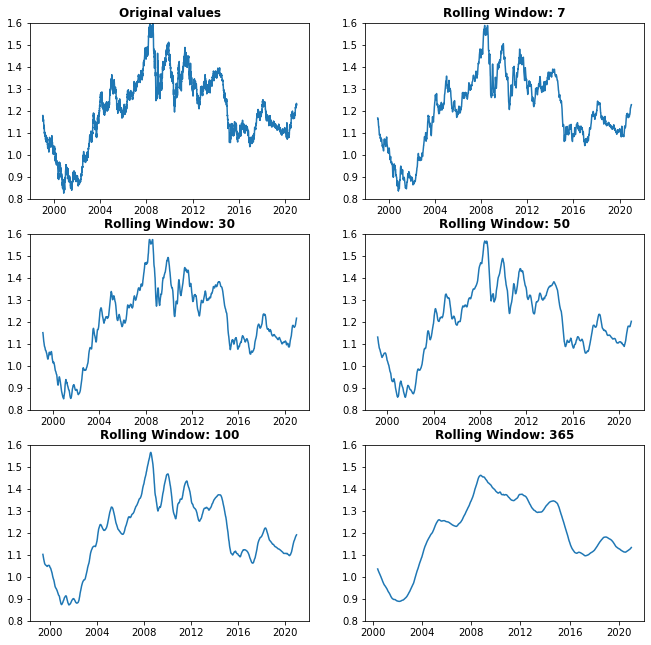

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(11,11))

# Subplot 1
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar']) 
plt.title('Original values',weight='bold')
plt.ylim([0.8,1.6])

# Subplot 2 - 6
for i, k in zip(range(2,7),[7,30,50,100,365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'].rolling(k).mean())
    plt.title('Rolling Window: ' + '{}'.format(k),weight='bold')
    plt.ylim([0.8,1.6])
                
plt.show()                

## Coming up with an Idea

For the graph we want to build, we use the following story: We'll show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot for our storytelling data visualization.

## Sketching a Graph

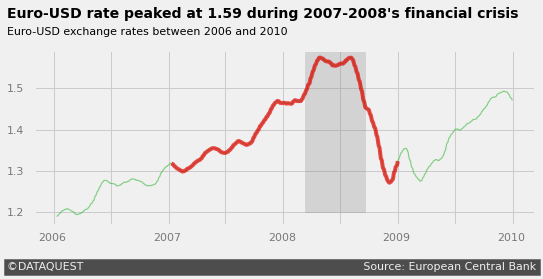

In [80]:
import matplotlib.style as style

style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(8,3))

# Add the plot
new_db = euro_to_dollar[euro_to_dollar['Time'].between('2005-11-29','2010-01-01') ]
new_db.reset_index(drop=True,inplace=True)
ax.plot(new_db['Time'],new_db['US_dollar'].rolling(30).mean(),linewidth=1.2,alpha=0.5,color='#15b01a')

# Highlight the 2007-2008 period
year_range = new_db[new_db['Time'].between('2006-11-25','2009-01-01')]
ax.plot(year_range['Time'], year_range['US_dollar'].rolling(30).mean(),color='#e50000',alpha=0.7)

# Reset tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13000
y = 1.67

# Add a title and a subtitle 
ax.text(x, y, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(13000,1.63,"Euro-USD exchange rates between 2006 and 2010",size=11)

# Add tick labels
for year in ['2006','2007','2008','2009','2010']:
    ax.text(x+100,1.13,year,alpha=0.5,size=11)
    x += 365

for dollar in ['1.2','1.3','1.4','1.5']:
    ax.text(13000,y-0.48,dollar,alpha=0.5,size=11)
    y += 0.1

# Highlight the peak of the crisis
ax.axvspan(xmin=13950,xmax=14140,ymin=0.07,ymax=1.18,color='grey',alpha=0.25)

# Add graph source
ax.text(13000,1.06,'©DATAQUEST' + ' '*80 + 'Source: European Central Bank',color='#f0f0f0',backgroundcolor = '#4d4d4d',
        size=11)

plt.show()